# 线性分类模型
线性模型也可用于分类问题。我们首先来看二分类。我们可以利用下面的公式预测：  

y^=w[0]x[0]+w[1]x[1]+...+w[p]*x[p]+b>0 

这个公式与线性回归的公式非常相似，但我们没有返回特征的加权求和，而是为预测设置了阈值（0）。如果函数值小于0，我们就预测类别-1，如果函数值大于0，我们就预测类别+1。对于所有用于分类的线性模型，这个预测规则都是通用的。同样，有很多不同的方法来找出系数（w）和截距（b）。
对于用于回归的线性模型，输出y^是特征的线性函数，是直线、平面或超平面（对于更高维的数据集）。对于用于分类的线性模型，**决策边界**是输入的线性函数。换句话说，（二元）线性分类器是利用直线、平面或超平面来分开两个类别的分类器。  
学习线性模型有很多种算法。这些算法的区别在于以下两点：
1.系数和截距的特定组合对训练数据拟合好坏的度量方法；
2.是否使用正则化，以及使用哪种正则化方法。  
不同的算法使用不同的方法来度量“对训练集拟合好坏”。由于数学上的技术原因，不可能调节w和b使得算法产生的误分类数量最少。对于我们的目的，以及对于许多有用而言，上面第一点（称为**损失函数**）的选择并不重要。  
最常见的两种线性分类算法是**Logistic回归（logistic regression）**和**线性支持向量机（linear support vector machine,线性SVM）**。

In [1]:
import sys
print("Python version:{}".format(sys.version))

import pandas as pd
print("pandas version:{}".format(pd.__version__))

import matplotlib
print("matplotlib version:{}".format(matplotlib.__version__))
import matplotlib.pyplot as plt

import numpy as np
print("Numpy version:{}".format(np.__version__))

import scipy as sp
print("Scipy version:{}".format(sp.__version__))

import IPython
print("IPython version:{}".format(IPython.__version__))

import sklearn
print("scikit-learn version:{}".format(sklearn.__version__))

import mglearn

Python version:3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
pandas version:0.23.4
matplotlib version:3.0.2
Numpy version:1.15.4
Scipy version:1.1.0
IPython version:7.2.0
scikit-learn version:0.20.1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


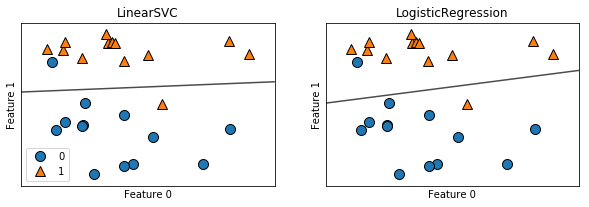

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y=mglearn.datasets.make_forge()

fig,axes=plt.subplots(1,2,figsize=(10,3))

for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

在上述图中，forge数据集的第一个特征位于x轴，第二个特征位于y轴，与前面相同。  
图中分别展示了LinearSVC和LogisticRegression得到的决策边界，都是直线，将顶部归为类别1的区域和底部归为类别0的区域分开了。换句话说，对于每个分类器而言，位于黑线上方的新数据点都会被划为类别1，而在黑线下方的点都会被划为类别0。  
两个模型得到了相似的决策边界。注意，两个模型中都有两个点的分类是错误的。两个模型默认使用L2正则化，就像Ridge对回归所做的那样。 

# 正则化
对于LogisticRegression和LinearSVC,决定正则化强度的权衡参数叫作C。C值越大，对应的正则化越弱。换句话说，如果参数C值较大，那么LogisticRegression和LinearSVC将尽可能将训练集拟合到最好，而如果C值较小，那么模型更强调使系数向量（w）接近于0。  
参数C的作用还有另一个有趣之处。较小的C值可以让算法尽量适应“大多数”数据点，而较大的C值强调每个数据点都分类正确的重要性。

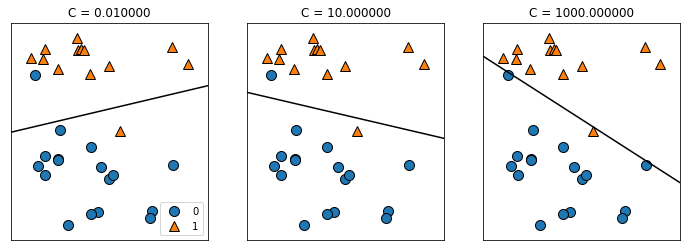

In [3]:
mglearn.plots.plot_linear_svc_regularization()

在上述左1图中,C值很小，对应强正则化。大部分属于类别0的点都位于底部，大部分属于类别1的点都位于顶部。强正则化的模型会选择一条相对水平的线，有两个点分类错误。在中间的图中，C值稍大，模型更关注两个分类错误的样本，使决策边界的斜率变大。最后，在右侧的图中，模型的C值非常大，使得决策边界的斜率也很大，选择模型对类别0中所有点的分类都是正确的。类别1中仍有一个点分类错误，这是因为对这个数据集来说，不可能用一条直线将所有点都分类正确。右侧图中的模型尽量是所有点的分类都正确，但可能无法掌握类别的整体分布。换句话说，这个模型很可能过拟合。  
与回归的情况类似，用于分类的线性模型在低维空间中看起来可能非常受限，决策边界只能是直线或平面。同样，在高维空间中，用于分类的线性模型变得非常强大，当考虑更多特征时，避免过拟合变得越来越重要。

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg=LogisticRegression().fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test,y_test)))

Training set score:0.953
Test set score:0.958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=1的默认值给出了相当好的性能，在训练集和测试集上都达到95%的精度。但由于训练集和测试集的性能非常接近，所以模型很可能是欠拟合的。我们尝试增大C来拟合一个更灵活的模型：

In [5]:
logreg100=LogisticRegression(C=100).fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg100.score(X_test,y_test)))

Training set score:0.972
Test set score:0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


使用C=100可以得到更高的训练集精度，也得到了稍高的测试集精度，这也证实了我们的直觉，即更复杂的模型应该性能更好。

In [6]:
logreg001=LogisticRegression(C=0.01).fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg001.score(X_test,y_test)))

Training set score:0.934
Test set score:0.930


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


最后，看一下正则化参数C取三个不同的值模型学到的系数：

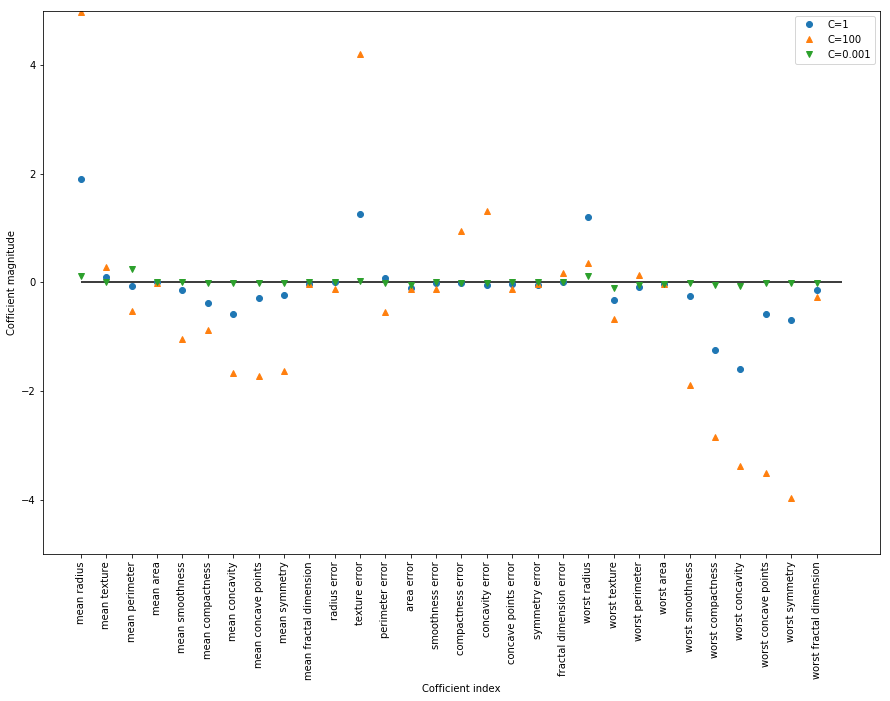

In [7]:
matplotlib.rcParams['figure.figsize'] = [15, 10]
plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg001.coef_.T,'v',label='C=0.001')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Cofficient index")
plt.ylabel("Cofficient magnitude")
plt.legend()

LogisticRegression模型默认应用L2正则化。更强的正则化使的系数更趋向于0，但系数永远不会正好等于0。进一步观察图像，还可以第3个系数那里发现有趣之处，这个系数是“平均周长”（mean perimeter）。C=100和C=1时这个系数为正，其绝对值比C=1时还要大。在解释这样的模型时，系数可以告诉我们某个特征与哪个类别有关。例如，人们可能会认为高“纹理错误”（texture error）特征与“恶性”样本有关。但“平均周长”系数的正负号发生变化，说明较大的“平均周长”可以被当作“良性”的指标或“恶性”的指标，具体取决于我们考虑的是哪个模型。这也说明，对线性模型系数的解释应该始终持保留态度。

如果想要一个可解释性更强的模型，使用L1正则化可能更好，因为它约束模型只使用少数几个特征：

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001:0.91
Test accuracy of l1 logreg with C=0.001:0.92


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=1.000:0.96
Test accuracy of l1 logreg with C=1.000:0.96
Training accuracy of l1 logreg with C=100.000:0.99
Test accuracy of l1 logreg with C=100.000:0.98


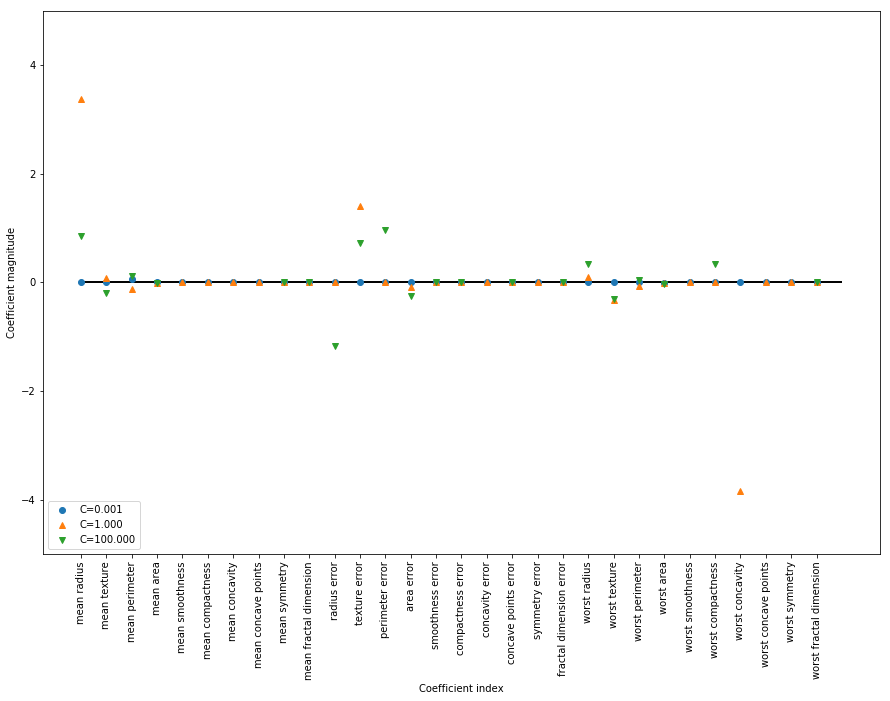

In [8]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(C=C,penalty="l1").fit(X_train,y_train)
    print("Training accuracy of l1 logreg with C={:.3f}:{:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}:{:.2f}".format(C,lr_l1.score(X_test,y_test)))
    
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
    plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
    plt.hlines(0,0,cancer.data.shape[1])
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5,5)
    plt.legend(loc=3)

# 用于多分类的线性模型
将二分类算法推广到多分类算法的一种常见方法是“一对多余”（one-vs.-rest）方法。在“一对多余”方法中，对每个类别都学习一个二分类模型，将这个类别与所有其他类别尽量分开，这样就生成了与类别格式一样多的二分类偶像。在测试点上运行所有二分类器来进行预测。在对应类别上分数最高的分类器“胜出”，将这个类别标签返回作为预测结果。  
每个类别都对应一个二类分类器，这样每个类别都有一个系数（w）向量与一个截距（b）。
我们将“一对多余”方法应用在一个简单的三分类数据集上。我们用到了一个二维数据集，每个类别的数据都是从一个高斯分布中采样得出的：

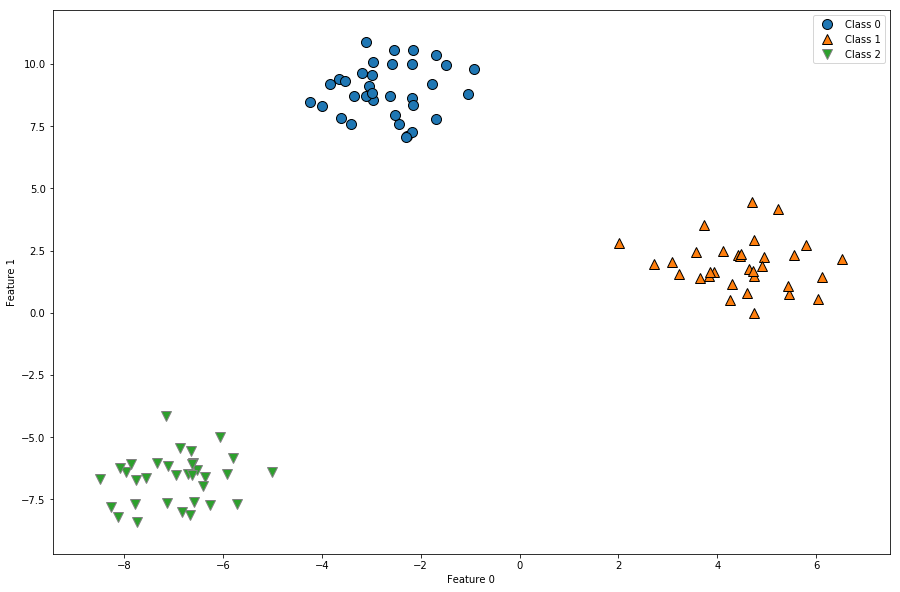

In [9]:
from sklearn.datasets import make_blobs

X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

在上面的数据集上训练一个LinearSVC分类器：

In [10]:
linear_svm=LinearSVC().fit(X,y)
print("Coefficient shape:",linear_svm.coef_.shape)
print("Intercept shape:",linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


我们看到，coef_的形状是(3,2),说明coef_每行包含三个类别之一的系数向量，每列包含某个特征（这个数据集有2个特征）对应的系数值。现在intercetp_是一维数组，保存每个类别的截距，我们将这3个二分类器给出的直线可视化：

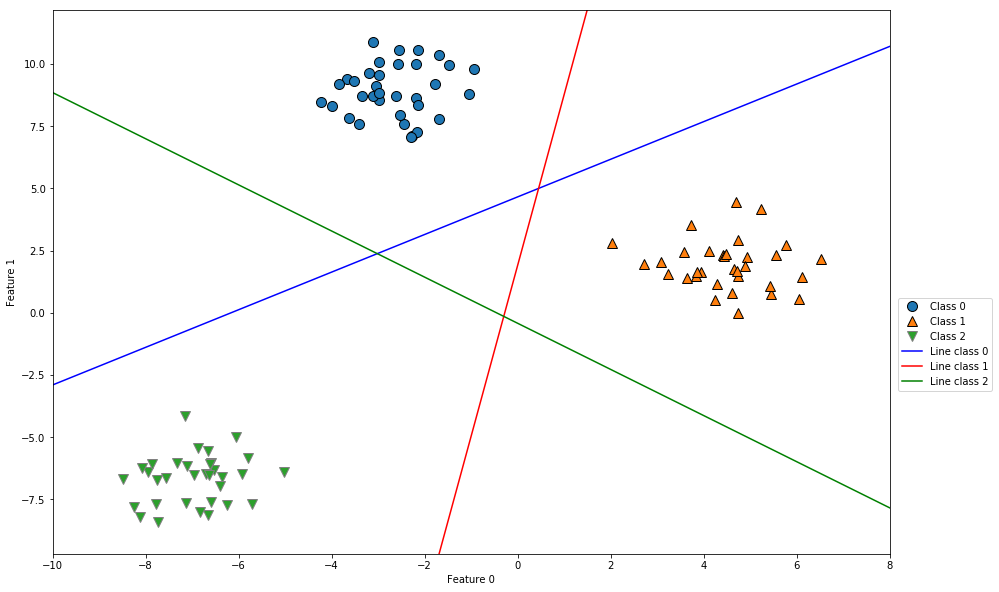

In [11]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
    plt.xlim(-10,8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))

你可以看到，训练集中所有属于类别0的点都在类别0对应的直线上方，这说明它们位于这个二分类器属于“类别0”的那一侧。属于类别0的点位于与类别2对应的直线上方，这说明它们被类别2的二分类器划为“其余”。属于类别0的点位于与类别1对应的直线左侧，这说明类别1的二元分类器将它们划为“其余”。因此，这一区域的所有点都会被最终分类器划为类别0（类别0的分类器的分类置信方程的结果大于0，其他两个类别对应的结果小于0）。
但图像中间的三角形区域属于哪一个类别呢，3个分类器都将这一区域内的点划为“其余”。这里的点应该应该划归到哪一个类别呢？答案是分类方程结果最大的那个类别，即最接近的那条线对应的类别。

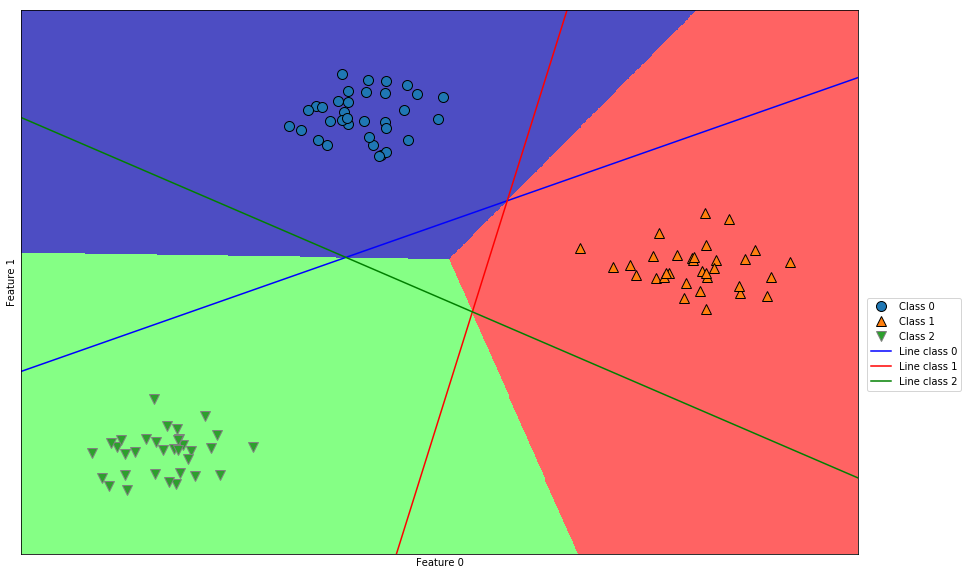

In [12]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))    

# 线性模型的优点、缺点和参数
线性模型的主要参数是正则化参数，在回归模型中叫作alpha,在LinearSVC和LogisticRegression中叫作C。alpha值较大或C值较小，说明模型比较简单。特别是对于回归模型而言，调节这些参数非常重要。通常在对数尺度上对C和alpha进行搜索。你还需要确定的是用L1正则化还是L2正则化。如果你假定只有几个特征是真正重要的，那么你应该用的是L1正则化，否则默认使用L2正则化。如果模型的可解释性很重要的话，使用L1也会有帮助。由于L1只用到几个特征，所以更容易解释哪些特征对模型时重要的，以及这些特征的作用。  
线性模型的训练速度非常快，预测速度也很快。这种模型可以推广到非常大的数据集，对稀疏数据也很有效。如果你的数据包含数十万甚至上百万个样本，你可能需要研究使用LogisticRegression和Ridge模型的solver='sag'选项，在处理大型数据时，这一选项比默认值要更快。其他选项还有SGDClassifier类和SGDRegressor类，它们对线性模型实现了可扩展性更强的版本。  
线性模型的另一个优点在于，利用我们之前见过的用于回归和分类的公式，理解如何进行预测是相对比较容易的。不幸的是，往往并不完全清楚系数为什么是这样的。如果你的数据集中包含高度相关的特征，这一问题尤为突出。在这种情况下，可能很难对系数做出解释。  
如果特征数量大于样本数量，线性模型的表现通常都很好。它也常用于非常大的数据集，只是尤为训练其他模型并不可行。但在更低维的空间中，其他模型的泛化性能可能更好。